<a href="https://colab.research.google.com/github/sdmadhav/ML-Project/blob/main/classification_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## New Section

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from collections import Counter

# Reading the data
df = pd.read_csv("HR.csv")

In [ ]:
from rich.console import Console
from rich.table import Table
from rich.text import Text

# Initialize the rich console for printing
console = Console()

In [ ]:
# Viewing the data
console.print("\n[bold cyan]Columns in Dataset[/bold cyan]")
console.print(df.columns)
console.print("\n[bold cyan]Shape of Dataset[/bold cyan]")
console.print(df.shape)
console.print("\n[bold cyan]Dataset Info[/bold cyan]")
console.print(df.info())

Columns in Dataset

Index(['Candidate Ref', 'DOJ Extended', 'Duration to accept offer',
       'Notice period', 'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

Shape of Dataset

(12333, 17)

Dataset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Candidate Ref                12333 non-null  int64  
 1   DOJ Extended                 12333 non-null  object 
 2   Duration to accept offer     9614 non-null   float64
 3   Notice period                12333 non-null  int64  
 4   Offered band                 12333 non-null  object 
 5   Pecent hike expected in CTC  11586 non-null  float64
 6   Percent hike offered in CTC  11737 non-null  float64
 7   Percent difference CTC       11482 non-null  float64
 8   Joining Bonus                12333 non-null  object 
 9   Candidate relocate actual    12333 non-null  object 
 10  Gender                       12333 non-null  object 
 11  Candidate Source             12333 non-null  object 
 12  Rex in Yrs                   12333 non-null  int64  
 13  LOB             

None

###########################################################################################################
# Data Preparation
###########################################################################################################


## Treating the Missing Values

In [ ]:
# Missing Values
missing_values = df.isna().sum()
console.print("\n[bold magenta]Missing Values[/bold magenta]")
display(missing_values)

Missing Values

,0
Candidate Ref,0
DOJ Extended,0
Duration to accept offer,2719
Notice period,0
Offered band,0
Pecent hike expected in CTC,747
Percent hike offered in CTC,596
Percent difference CTC,851
Joining Bonus,0
Candidate relocate actual,0


In [ ]:
# Treating the missing values in Duration to accept offer
console.print("\n[bold cyan]Summary of Duration to accept offer[/bold cyan]")
print()
console.print(df['Duration to accept offer'].describe())

Summary of Duration to accept offer

count    9614.000000
mean       21.189619
std        26.410351
min      -228.000000
25%         2.000000
50%         9.000000
75%        32.000000
max       224.000000
Name: Duration to accept offer, dtype: float64

In [ ]:
df.columns = df.columns.str.replace('.', ' ')
df.columns

Index(['Candidate Ref', 'DOJ Extended', 'Duration to accept offer',
       'Notice period', 'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

In [ ]:
# Replace negative values by NA
df.loc[df['Duration to accept offer'] < 0, 'Duration to accept offer'] = np.nan

# Replace the missing values by mean of DOJ Extended groups
mean_duration_by_doj = df.groupby('DOJ Extended')['Duration to accept offer'].mean()
df['Duration'] = df.apply(lambda row: mean_duration_by_doj[row['DOJ Extended']] if pd.isna(row['Duration to accept offer']) else row['Duration to accept offer'], axis=1)

console.print("\n[bold cyan]Rows with Missing Duration (After Imputation)[/bold cyan]")
missing_duration = df[df['Duration to accept offer'].isna()][['Duration to accept offer', 'DOJ Extended', 'Duration']]
console.print(missing_duration)

Rows with Missing Duration (After Imputation)

Duration to accept offer DOJ Extended   Duration
7                           NaN           No  13.437584
9                           NaN           No  13.437584
33                          NaN           No  13.437584
34                          NaN           No  13.437584
35                          NaN           No  13.437584
...                         ...          ...        ...
12324                       NaN           No  13.437584
12325                       NaN           No  13.437584
12327                       NaN           No  13.437584
12328                       NaN           No  13.437584
12329                       NaN           No  13.437584

[2738 rows x 3 columns]

In [ ]:
# Treating the Missing Values in Percent difference CTC
imputer = SimpleImputer(strategy='median')
df['Percent difference CTC'] = imputer.fit_transform(df[['Percent difference CTC']])

## Combining Offered band

In [ ]:
# Band Offered vs HR Status
T_OB = pd.crosstab(df['Status'], df['Offered band'])
console.print("\n[bold cyan]Band Offered vs HR Status[/bold cyan]")
console.print(T_OB)

Band Offered vs HR Status

Offered band   E0    E1    E2   E3  E4  E5  E6
Status                                        
Joined        882  4898  2366  486  75  17   1
Not Joined    176  2098  1092  204  31   6   1

In [ ]:
# Creating only 4 Groups
df['Offered band'] = df['Offered band'].replace({'E3': 'E3 and Above', 'E4': 'E3 and Above', 'E5': 'E3 and Above', 'E6': 'E3 and Above'})

T_OB = pd.crosstab(df['Status'], df['Offered band'])
console.print("\n[bold cyan]Band Offered vs HR Status (After Grouping)[/bold cyan]")

console.print(T_OB)

Band Offered vs HR Status (After Grouping)

Offered band   E0    E1    E2  E3 and Above
Status                                     
Joined        882  4898  2366           579
Not Joined    176  2098  1092           242

## Combining LOB into 'Others'


In [ ]:
# LOB vs HR Status
T_LOB = pd.crosstab(df['Status'], df['LOB'])
console.print("\n[bold cyan]LOB vs HR Status[/bold cyan]")

console.print(T_LOB)


LOB vs HR Status

LOB         AXON  BFSI  BSERV  CORP  CSMP  EAS   ERS  ETS  Healthcare  INFRA  \
Status                                                                         
Joined       455  1084    720   175   500  274  1954  626         106   2742   
Not Joined   204   659     77    35   193  165  1135  328          66    732   

LOB         MMS  SALES  
Status                  
Joined       15     74  
Not Joined    3     11

In [ ]:
df['LOB'] = df['LOB'].replace({'CORP': 'Others', 'Healthcare': 'Others', 'MMS': 'Others', 'SALES': 'Others'})

T_LOB = pd.crosstab(df['Status'], df['LOB'])
console.print("\n[bold cyan]LOB vs HR Status (After Combining Categories)[/bold cyan]")

console.print(T_LOB)



LOB vs HR Status (After Combining Categories)

LOB         AXON  BFSI  BSERV  CSMP  EAS   ERS  ETS  INFRA  Others
Status                                                            
Joined       455  1084    720   500  274  1954  626   2742     370
Not Joined   204   659     77   193  165  1135  328    732     115

## Combining Locations into 'Others'


In [ ]:

# Location vs HR Status
T_LOC = pd.crosstab(df['Status'], df['Location'])
console.print("\n[bold cyan]Location vs HR Status[/bold cyan]")
console.print(T_LOC)


Location vs HR Status

Location    Ahmedabad  Bangalore  Chennai  Cochin  Coimbatore  Gurgaon  \
Status                                                                   
Joined              6       1838     2971       7          85      137   
Not Joined          1       1027     1318       1           2       52   

Location    Hyderabad  Kolkata  Mumbai  Noida  Others  Pune  
Status                                                       
Joined            335      103     188   2987      14    54  
Not Joined        170       40      63    911       1    22

In [ ]:

df['Location'] = df['Location'].replace({
    'Ahmedabad': 'Others', 'Cochin': 'Others', 'Coimbatore': 'Others',
    'Kolkata': 'Others', 'Others': 'Others', 'Pune': 'Others'
})

T_LOC = pd.crosstab(df['Status'], df['Location'])
console.print("\n[bold cyan]Location vs HR Status (After Combining Categories)[/bold cyan]")

console.print(T_LOC)


Location vs HR Status (After Combining Categories)

Location    Bangalore  Chennai  Gurgaon  Hyderabad  Mumbai  Noida  Others
Status                                                                   
Joined           1838     2971      137        335     188   2987     269
Not Joined       1027     1318       52        170      63    911      67

## Final Data


In [ ]:

df = df.drop(columns=['Candidate Ref', 'Duration to accept offer', 'Pecent hike expected in CTC', 'Percent hike offered in CTC'])
missing_values_final = df.isna().sum()
console.print("\n[bold cyan]Missing Values in Final Dataset[/bold cyan]")
display(missing_values_final)

Missing Values in Final Dataset

,0
DOJ Extended,0
Notice period,0
Offered band,0
Percent difference CTC,0
Joining Bonus,0
Candidate relocate actual,0
Gender,0
Candidate Source,0
Rex in Yrs,0
LOB,0


In [ ]:
# Display the final columns and attach
console.print("\n[bold cyan]Final Dataset Columns[/bold cyan]")
console.print(df.columns)

Final Dataset Columns

Index(['DOJ Extended', 'Notice period', 'Offered band',
       'Percent difference CTC', 'Joining Bonus', 'Candidate relocate actual',
       'Gender', 'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age',
       'Status', 'Duration'],
      dtype='object')

In [ ]:
display(df.head())

,DOJ Extended,Notice period,Offered band,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status,Duration
0,Yes,30,E2,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined,14.0
1,No,30,E2,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined,18.0
2,No,45,E2,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined,3.0
3,No,30,E2,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined,26.0
4,Yes,120,E2,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined,1.0


In [ ]:
df['Status'].value_counts()

,count
Status,
Joined,8725
Not Joined,3608


<Axes: xlabel='Status'>

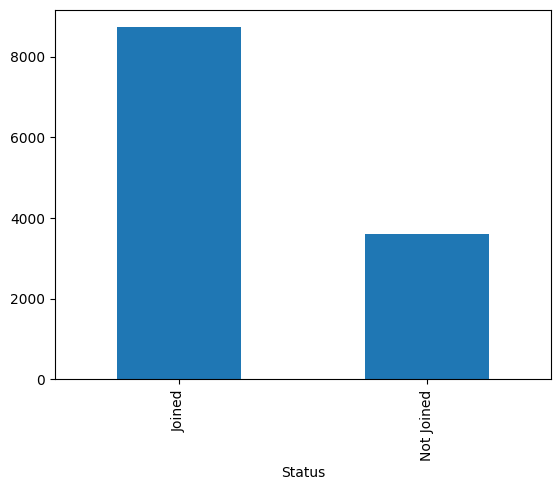

In [ ]:
df['Status'].value_counts().plot(kind='bar')

In [ ]:
df.groupby('Candidate Source')['Status'].count()

,Status
Candidate Source,
Agency,3170
Direct,7075
Employee Referral,2088


In [ ]:
# Get columns of object dtype
object_columns = df.select_dtypes(include='object').columns

# Create an empty dictionary to store unique value counts
unique_counts = {}

# Iterate over object columns and count unique values
for col in object_columns:
    unique_counts[col] = df[col].nunique()

# Create a DataFrame from the unique counts
unique_counts_df = pd.DataFrame.from_dict(unique_counts, orient='index', columns=['Unique Value Count'])

# Display the DataFrame

unique_counts_df


,Unique Value Count
DOJ Extended,2
Offered band,4
Joining Bonus,2
Candidate relocate actual,2
Gender,2
Candidate Source,3
LOB,9
Location,7
Status,2


In [ ]:
df.shape

(12333, 14)

In [ ]:
# Perform one-hot encoding on object columns
object_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=object_cols, dtype=int, drop_first=True)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Notice period                       12333 non-null  int64  
 1   Percent difference CTC              12333 non-null  float64
 2   Rex in Yrs                          12333 non-null  int64  
 3   Age                                 12333 non-null  int64  
 4   Duration                            12333 non-null  float64
 5   DOJ Extended_Yes                    12333 non-null  int64  
 6   Offered band_E1                     12333 non-null  int64  
 7   Offered band_E2                     12333 non-null  int64  
 8   Offered band_E3 and Above           12333 non-null  int64  
 9   Joining Bonus_Yes                   12333 non-null  int64  
 10  Candidate relocate actual_Yes       12333 non-null  int64  
 11  Gender_Male                         12333

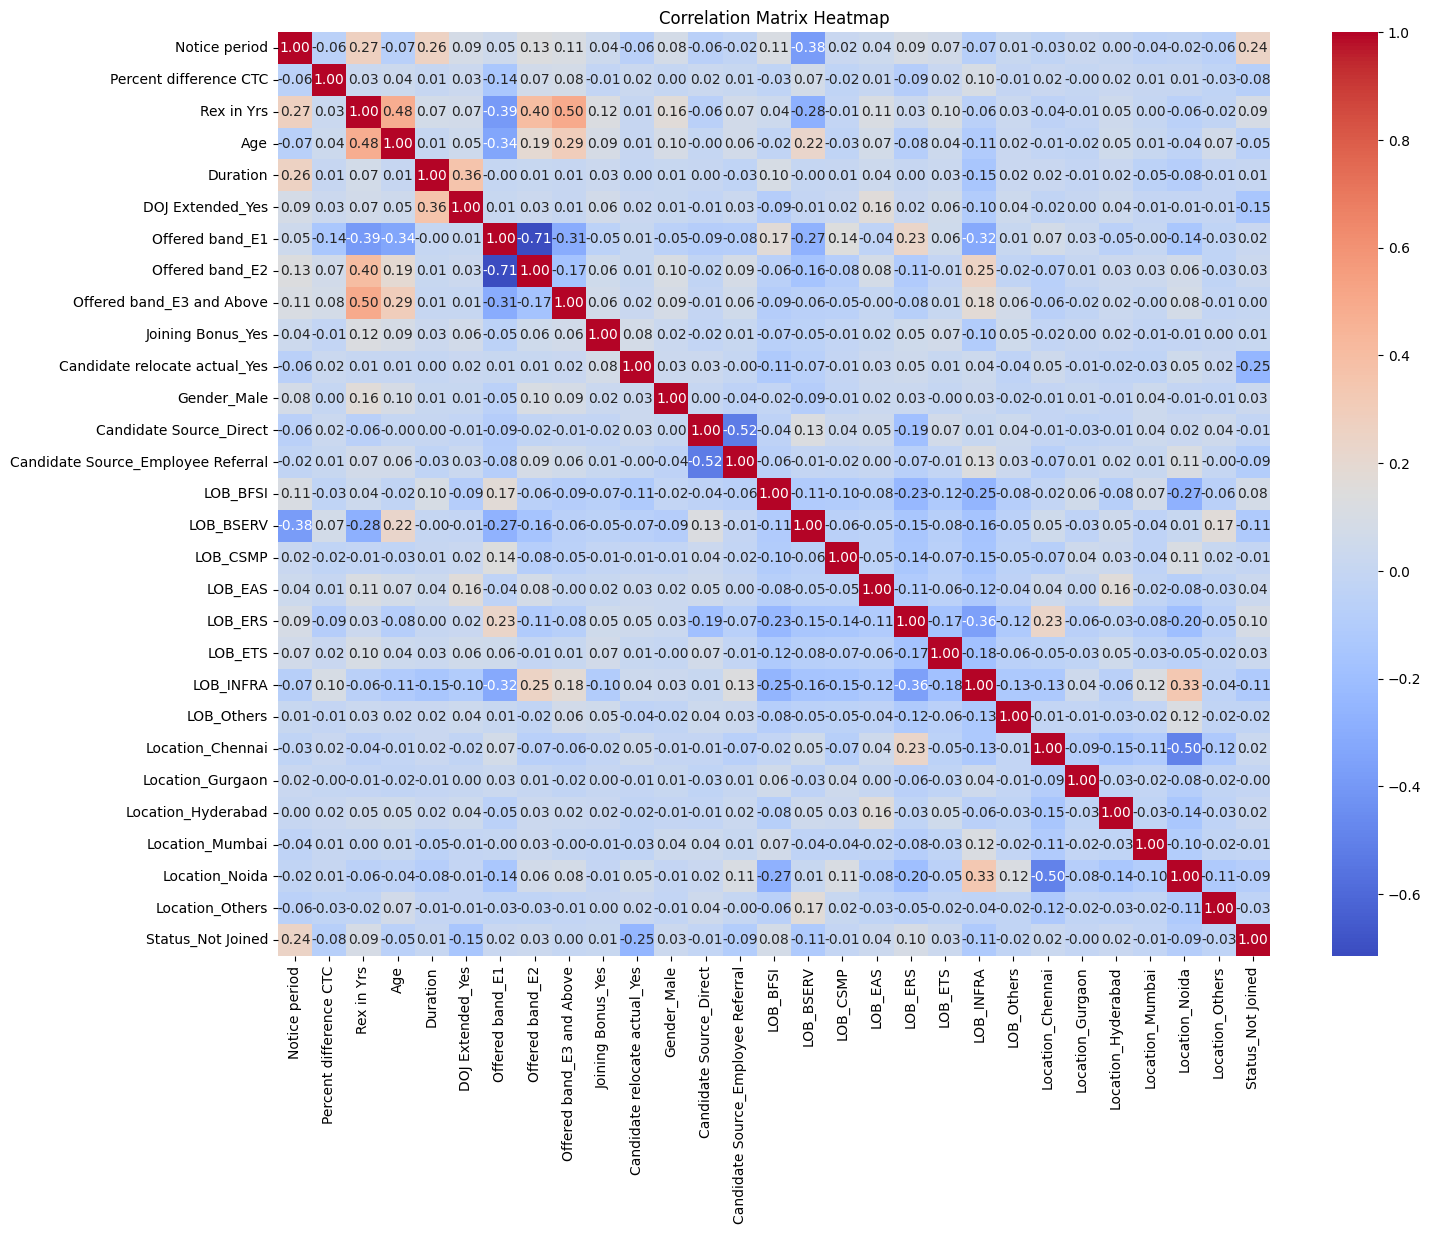

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


## Split the data

In [ ]:
# from sklearn.model_selection import train_test_split

# # Define features (X) and target (y)
# X = df.drop('Status_Not Joined', axis=1)
# y = df['Status_Not Joined']

# # Step 1: Split the data into training (30%) and combined validation + test (70%)
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.7, random_state=42)

# # Step 2: Split the combined validation + test set into validation (20%) and test (50%)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Now you have:
# # X_train, y_train: Training features and target (30% of data)
# # X_val, y_val: Validation features and target (20% of data)
# # X_test, y_test: Testing features and target (50% of data)

# print("Training set:", X_train.shape, y_train.shape)
# print("Validation set:", X_val.shape, y_val.shape)
# print("Testing set:", X_test.shape, y_test.shape)


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [ ]:
def split_data():
    X = df.drop('Status_Not Joined', axis=1)
    y = df['Status_Not Joined']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    # X_val, y_val = X_val, y_val  # Save validation set for later
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = split_data()

In [ ]:
y_train.value_counts(), y_test.value_counts()

(Status_Not Joined
 0    6985
 1    2881
 Name: count, dtype: int64,
 Status_Not Joined
 0    1740
 1     727
 Name: count, dtype: int64)

In [ ]:
!pip install ipywidgets

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler

feature_names = df.drop(['Status_Not Joined'], axis=1).columns.tolist()

# Function to plot decision boundaries for selected features
def plot_decision_boundaries(feature_1, feature_2):
    X = df[[feature_1, feature_2]]  # Use only the selected two features
    y = df['Status_Not Joined']

    # Standardize the features for better visualization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train Logistic Regression
    log_reg = LogisticRegression()
    log_reg.fit(X_scaled, y)

    # Train Decision Tree
    tree_clf = DecisionTreeClassifier(max_depth=4, random_state=0)
    tree_clf.fit(X_scaled, y)

    # Train Random Forest
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
    rf_clf.fit(X_scaled, y)

    # Train Gradient Boosting
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=0)
    gb_clf.fit(X_scaled, y)

    # Plot Decision Boundaries
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    models = {
        'Logistic Regression': log_reg,
        'Decision Tree': tree_clf,
        'Random Forest': rf_clf,
        'Gradient Boosting': gb_clf
    }

    for ax, (name, model) in zip(axes.ravel(), models.items()):
        disp = DecisionBoundaryDisplay.from_estimator(
            model, X_scaled, response_method='predict', cmap='coolwarm', alpha=0.3, ax=ax
        )

        sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y, palette='coolwarm', ax=ax)
        ax.set_title(name)
        ax.set_xlabel(feature_1)
        ax.set_ylabel(feature_2)

    plt.tight_layout()
    plt.show()

# Create dropdowns for selecting features
feature_1_dropdown = widgets.Dropdown(
    options=feature_names,
    value=feature_names[0],  # Default value
    description='Feature 1:',
)

feature_2_dropdown = widgets.Dropdown(
    options=feature_names,
    value=feature_names[1],  # Default value
    description='Feature 2:',
)

# Set up the interactive plot
widgets.interactive(plot_decision_boundaries, feature_1=feature_1_dropdown, feature_2=feature_2_dropdown)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.9 MB/s eta 0:00:00


interactive(children=(Dropdown(description='Feature 1:', options=('Notice period', 'Percent difference CTC', '…

In [ ]:
def feature_selection():
    X = sm.add_constant(X_train)  # Use only training data
    y = y_train
    glm = sm.GLM(y, X, family=sm.families.Binomial())
    results = glm.fit()
    console.print(results.summary())
    # Use the selected features for prediction on X_test
    probs = results.predict(sm.add_constant(X_test)) # Removing Constant
    labels = np.array([0]*len(y_test))
    labels[probs>0.5] = 1
    print(confusion_matrix(y_test,labels))
    significant_features = results.pvalues[results.pvalues < 0.05].index.tolist()
    if 'const' in significant_features:
        significant_features.remove('const')
    console.print("Selected Features:", significant_features)
    return significant_features

In [ ]:
selected_features = feature_selection()
feature_names = selected_features

Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Status_Not Joined   No. Observations:                 9866
Model:                            GLM   Df Residuals:                     9837
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4844.6
Date:                Sun, 30 Mar 2025   Deviance:                       9689.3
Time:                        17:02:32   Pearson chi2:                 8.79e+03
No. Iterations:                    26   Pseudo R-squ. (CS):             0.2021
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.8325      0.288      2.889      0.004       0.268       1.397
Notice period                          0.0203      0.001     16.901      0.000       0.018       0.023
Percent difference CTC                -0.0067      0.001     -4.501      0.000      -0.010      -0.004
Rex in Yrs                             0.0425      0.016      2.677      0.007       0.011       0.074
Age                                   -0.0304      0.008     -3.877      0.000      -0.046      -0.015
Duration                              -0.0002      0.001     -0.137      0.891      -0.002       0.002
DOJ Extended_Yes                      -0.9287      0.058    -15.970      0.000      -1.043      -0.815
Offered band_E1                       -0.9643      0.161     -5.990      0.000      -1.280      -0.649
Offered band_E2                       -0.7413      0.176     -4.216      0.000      -1.086      -0.397
Offered band_E3 and Above             -0.8606      0.223     -3.851      0.000      -1.299      -0.423
Joining Bonus_Yes                      0.1965      0.126      1.565      0.118      -0.050       0.443
Candidate relocate actual_Yes        -26.8440   1.51e+04     -0.002      0.999   -2.97e+04    2.96e+04
Gender_Male                            0.1480      0.066      2.250      0.024       0.019       0.277
Candidate Source_Direct               -0.1905      0.060     -3.190      0.001      -0.308      -0.073
Candidate Source_Employee Referral    -0.6338      0.083     -7.604      0.000      -0.797      -0.470
LOB_BFSI                              -0.2370      0.133     -1.784      0.074      -0.498       0.023
LOB_BSERV                             -1.3310      0.236     -5.636      0.000      -1.794      -0.868
LOB_CSMP                              -0.2698      0.153     -1.758      0.079      -0.570       0.031
LOB_EAS                                0.5244      0.173      3.024      0.002       0.185       0.864
LOB_ERS                                0.0677      0.126      0.537      0.591      -0.179       0.315
LOB_ETS                                0.0340      0.141      0.241      0.810      -0.243       0.311
LOB_INFRA                             -0.6605      0.134     -4.915      0.000      -0.924      -0.397
LOB_Others                            -0.4605      0.173     -2.668      0.008      -0.799      -0.122
Location_Chennai                      -0.0379      0.066     -0.573      0.567      -0.168       0.092
Location_Gurgaon                      -0.0928      0.207     -0.449      0.653      -0.498       0.312
Location_Hyderabad                     0.1204      0.132      0.915      0.360      -0.138       0.378
Location_Mumbai                        0.0816      0.178      0.458      0.647      -0.267       0.430
Location_Noida                        -0.2354      0.078  

[[1578  162]
 [ 453  274]]


Selected Features:
[
    'Notice period',
    'Percent difference CTC',
    'Rex in Yrs',
    'Age',
    'DOJ Extended_Yes',
    'Offered band_E1',
    'Offered band_E2',
    'Offered band_E3 and Above',
    'Gender_Male',
    'Candidate Source_Direct',
    'Candidate Source_Employee Referral',
    'LOB_BSERV',
    'LOB_EAS',
    'LOB_INFRA',
    'LOB_Others',
    'Location_Noida',
    'Location_Others'
]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_models(model, X, y):
    preds = model.predict(X[selected_features])
    accuracy = accuracy_score(y, preds)

    # Transposed confusion matrix
    confusion = confusion_matrix(y, preds).T

    print(f"Accuracy: {accuracy:.4f}\n")

    print("Confusion Matrix:\n")
    sns.heatmap(confusion,
                annot=True,
                fmt='g',
                xticklabels=['Joined','Not Joined'],
                yticklabels=['Joined','Not Joined'],
                cmap="Blues")

    # Swap axis labels
    plt.xlabel('Actual', fontsize=13)  # Now X-axis represents actual
    plt.ylabel('Prediction', fontsize=13)  # Now Y-axis represents predicted
    plt.title('Confusion Matrix', fontsize=17, pad=20)
    plt.gca().xaxis.set_label_position('top')
    plt.gca().xaxis.tick_top()

    plt.gca().figure.subplots_adjust(bottom=0.2)
    plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
    plt.show()

    console.print("\nClassification Report:")
    console.print(classification_report(y, preds))

    return {
        'accuracy': accuracy,
        'confusion_matrix': confusion,
        'classification_report': classification_report(y, preds, output_dict=True)
    }


train_logistic_regression

In [ ]:
def train_logistic_regression(X = X_train, y = y_train):
    model = LogisticRegression(max_iter=10000,class_weight='balanced')
    model.fit(X[selected_features], y)
    return model


Accuracy: 0.6514

Confusion Matrix:



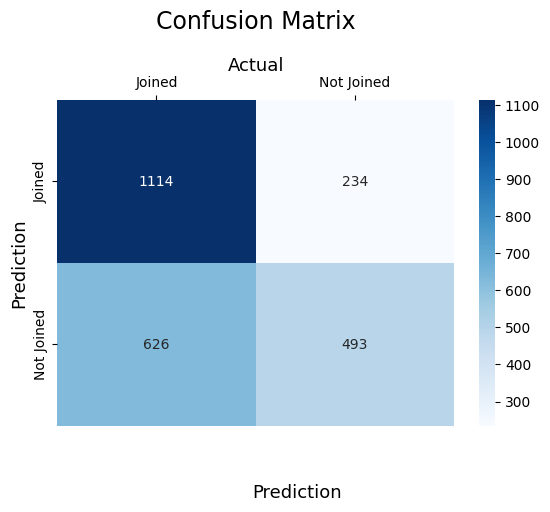

Classification Report:

precision    recall  f1-score   support

           0       0.83      0.64      0.72      1740
           1       0.44      0.68      0.53       727

    accuracy                           0.65      2467
   macro avg       0.63      0.66      0.63      2467
weighted avg       0.71      0.65      0.67      2467

In [ ]:
model = train_logistic_regression()
lr_out = evaluate_models(model, X_test, y_test)


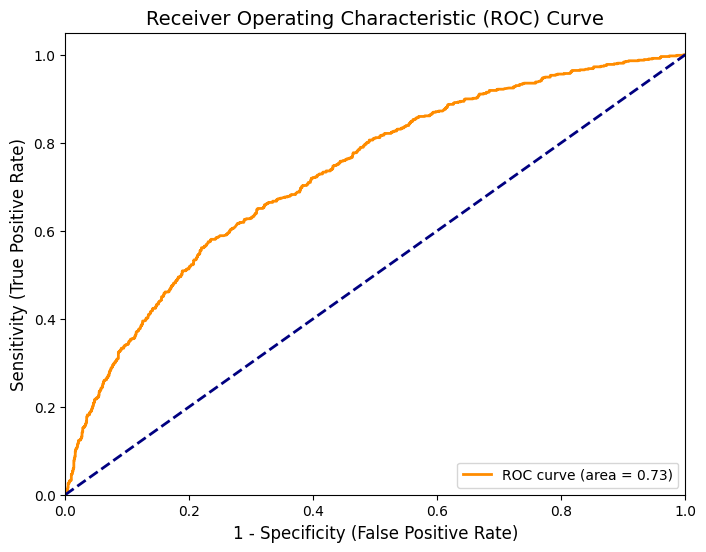

Optimal Threshold: 0.5710950045769092

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class (Not Joined)
y_pred_proba = model.predict_proba(X_test[selected_features])[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.show()
print()

console.print("Optimal Threshold:", thresholds[np.argmax(tpr - fpr)])


Prediction for threshold 0.5710950045769092:
Accuracy: 0.7041

Confusion Matrix:



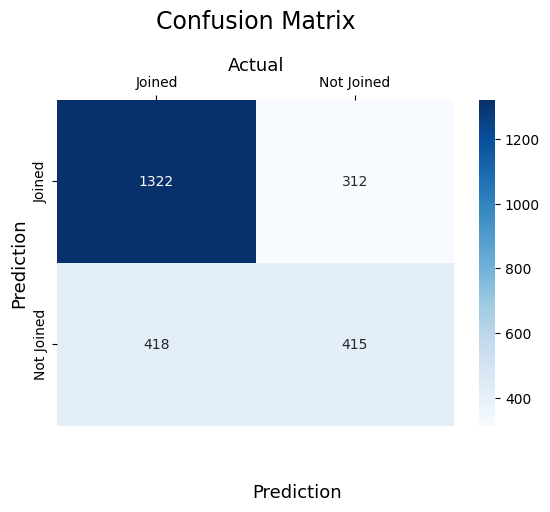

Classification Report:

precision    recall  f1-score   support

           0       0.81      0.76      0.78      1740
           1       0.50      0.57      0.53       727

    accuracy                           0.70      2467
   macro avg       0.65      0.67      0.66      2467
weighted avg       0.72      0.70      0.71      2467

In [ ]:
threshold = 0.5710950045769092
preds = (y_pred_proba >= threshold).astype(int)
print(f"\nPrediction for threshold {threshold}:")
accuracy = accuracy_score(y_test, preds)

# Transposed confusion matrix
confusion = confusion_matrix(y_test, preds).T

print(f"Accuracy: {accuracy:.4f}\n")

print("Confusion Matrix:\n")
sns.heatmap(confusion,
            annot=True,
            fmt='g',
            xticklabels=['Joined','Not Joined'],
            yticklabels=['Joined','Not Joined'],
            cmap="Blues")

# Swap axis labels
plt.xlabel('Actual', fontsize=13)  # Now X-axis represents actual
plt.ylabel('Prediction', fontsize=13)  # Now Y-axis represents predicted
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

console.print("\nClassification Report:")
console.print(classification_report(y_test, preds))

In [ ]:
def train_decision_tree(X = X_train, y = y_train):
    param_grid = {
        'max_depth': range(1, 15),
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 5, 10]
    }
    kfold = KFold(10, random_state=1, shuffle=True)
    model = DecisionTreeClassifier(criterion='entropy', random_state=0, class_weight='balanced')
    grid = GridSearchCV(model, param_grid, cv=kfold, scoring='roc_auc', n_jobs=-1)
    grid.fit(X[selected_features], y)

    print("Best Decision Tree Parameters:", grid.best_params_)
    return grid.best_estimator_

In [ ]:
console.print('''Best Random Forest Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500}''')

Best Random Forest Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500}

Best Decision Tree Parameters: {'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2}
Accuracy: 0.6863

Confusion Matrix:



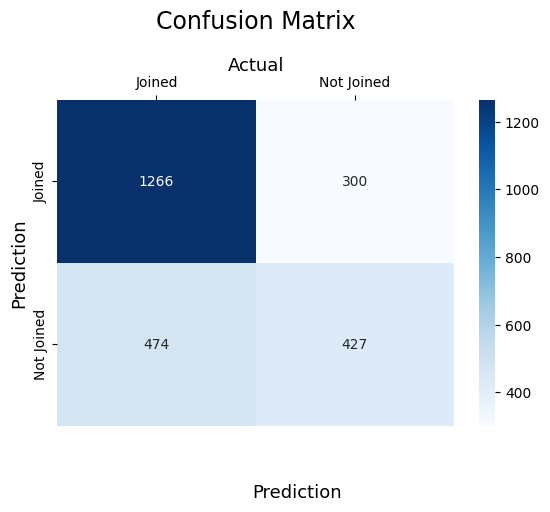

Classification Report:

precision    recall  f1-score   support

           0       0.81      0.73      0.77      1740
           1       0.47      0.59      0.52       727

    accuracy                           0.69      2467
   macro avg       0.64      0.66      0.65      2467
weighted avg       0.71      0.69      0.69      2467

,importance
Notice period,0.385907
DOJ Extended_Yes,0.205426
LOB_INFRA,0.099071
Percent difference CTC,0.096800
Rex in Yrs,0.057267
Age,0.051489
Candidate Source_Employee Referral,0.030757
Location_Noida,0.028508
LOB_Others,0.019331
Location_Others,0.012731


In [ ]:
model2 = train_decision_tree()
evaluate_models(model2, X_test, y_test)
feature_imp = pd.DataFrame(
    {'importance':model2.feature_importances_},
    index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

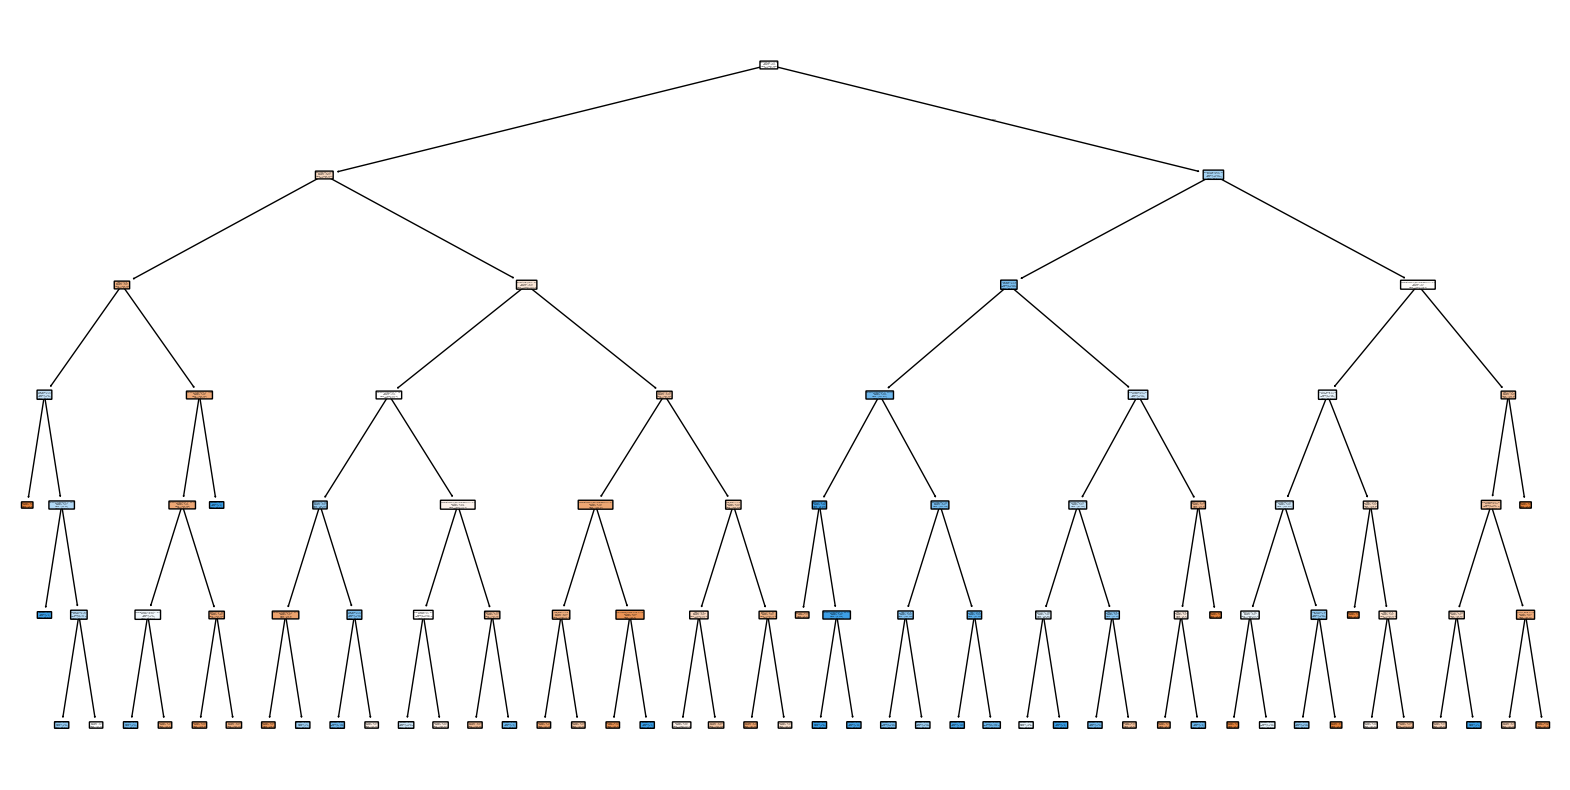

In [ ]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model2, filled=True, feature_names=selected_features, class_names=['Joined','Not Joined'], rounded=True)
plt.show()


In [ ]:
from sklearn.tree import export_text

# Export the decision tree to text format
tree_text = export_text(model2, feature_names=selected_features)

# Print the tree
console.print(tree_text)

# Get the number of leaf nodes
n_leaves = model2.get_n_leaves()
console.print(f"\nNumber of leaf nodes: {n_leaves}")

# Get the depth of the tree (height)
depth = model2.get_depth()
console.print(f"Depth (height) of the tree: {depth}")


|--- Notice period <= 37.50
|   |--- Notice period <= 15.00
|   |   |--- Age <= 23.50
|   |   |   |--- LOB_INFRA <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- LOB_INFRA >  0.50
|   |   |   |   |--- Percent difference CTC <= -10.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Percent difference CTC >  -10.00
|   |   |   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Gender_Male >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- Age >  23.50
|   |   |   |--- Percent difference CTC <= 71.38
|   |   |   |   |--- Percent difference CTC <= -22.45
|   |   |   |   |   |--- Candidate Source_Direct <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Candidate Source_Direct >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Percent difference CTC >  -22.45
|   |   |   |   |   |--- Rex in Yrs <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Rex in Yrs >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Percent difference CTC >  71.38
|   |   |   |   |--- class: 1
|   |--- Notice period >  15.00
|   |   |--- DOJ Extended_Yes <= 0.50
|   |   |   |--- Percent difference CTC <= -18.30
|   |   |   |   |--- Rex in Yrs <= 1.50
|   |   |   |   |   |--- Percent difference CTC <= -21.43
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Percent difference CTC >  -21.43
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Rex in Yrs >  1.50
|   |   |   |   |   |--- LOB_INFRA <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- LOB_INFRA >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Percent difference CTC >  -18.30
|   |   |   |   |--- Candidate Source_Employee Referral <= 0.50
|   |   |   |   |   |--- Offered band_E1 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Offered band_E1 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Candidate Source_Employee Referral >  0.50
|   |   |   |   |   |--- Rex in Yrs <= 11.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Rex in Yrs >  11.50
|   |   |   |   |   |   |--- class: 1
|   |   |--- DOJ Extended_Yes >  0.50
|   |   |   |--- Rex in Yrs <= 2.50
|   |   |   |   |--- Candidate Source_Employee Referral <= 0.50
|   |   |   |   |   |--- LOB_INFRA <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- LOB_INFRA >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Candidate Source_Employee Referral >  0.50
|   |   |   |   |   |--- Offered band_E3 and Above <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Offered band_E3 and Above >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- Rex in Yrs >  2.50
|   |   |   |   |--- LOB_INFRA <= 0.50
|   |   |   |   |   |--- Age <= 30.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Age >  30.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- LOB_INFRA >  0.50
|   |   |   |   |   |--- Rex in Yrs <= 5.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Rex in Yrs >  5.50
|   |   |   |   |   |   |--- class: 0
|--- Notice period >  37.50
|   |--- DOJ Extended_Yes <= 0.50
|   |   |--- LOB_INFRA <= 0.50
|   |   |   |--- Percent difference CTC <= -21.53
|   |   |   |   |--- Rex in Yrs <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Rex in Yrs >  1.50
|   |   |   |   |   |--- Percent difference CTC <= -30.30
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Percent difference CTC >  -30.30
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- Percent difference CTC >  -21.53
|   |   |   |   |--- Notice period <= 67.50
|   |   |   |   |   |--- Age <= 31.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  31.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Notice period >  67.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |  

Number of leaf nodes: 51

Depth (height) of the tree: 6

In [ ]:
def train_random_forest(X = X_train, y = y_train):
    param_grid = {
        'n_estimators': [100, 200, 500],
        'max_features': [None, 'sqrt', 'log2'],
        'max_depth': [10, 20, 30]
    }
    model = RandomForestClassifier(random_state=0, class_weight='balanced')
    grid = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid.fit(X[selected_features], y)

    print("Best Random Forest Parameters:", grid.best_params_)
    return grid.best_estimator_


Best Random Forest Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500}
Accuracy: 0.7154

Confusion Matrix:



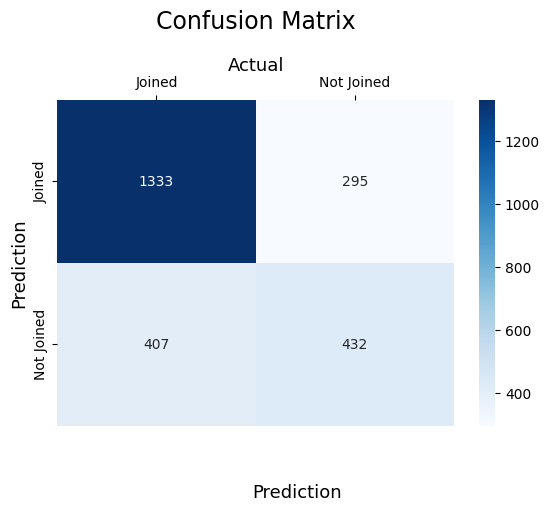

Classification Report:

precision    recall  f1-score   support

           0       0.82      0.77      0.79      1740
           1       0.51      0.59      0.55       727

    accuracy                           0.72      2467
   macro avg       0.67      0.68      0.67      2467
weighted avg       0.73      0.72      0.72      2467

,importance
Notice period,0.216525
Percent difference CTC,0.169149
Rex in Yrs,0.124099
DOJ Extended_Yes,0.107712
Age,0.102774
LOB_INFRA,0.056024
Location_Noida,0.039715
Candidate Source_Employee Referral,0.034537
LOB_BSERV,0.028272
Offered band_E1,0.022809


In [ ]:
model3 = train_random_forest()
evaluate_models(model3, X_test, y_test)
feature_imp = pd.DataFrame(
    {'importance':model3.feature_importances_},
    index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

In [ ]:
def train_gradient_boosting(X = X_train, y = y_train):
    param_grid = {
        'n_estimators': [100, 500, 1000],
        'learning_rate': [0.001, 0.01, 0.1],
        'max_depth': [3, 5, 7]
    }
    model = GradientBoostingClassifier(random_state=0)
    grid = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid.fit(X[selected_features], y)

    print("Best Gradient Boosting Parameters:", grid.best_params_)
    return grid.best_estimator_

Best Gradient Boosting Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
Accuracy: 0.7519

Confusion Matrix:



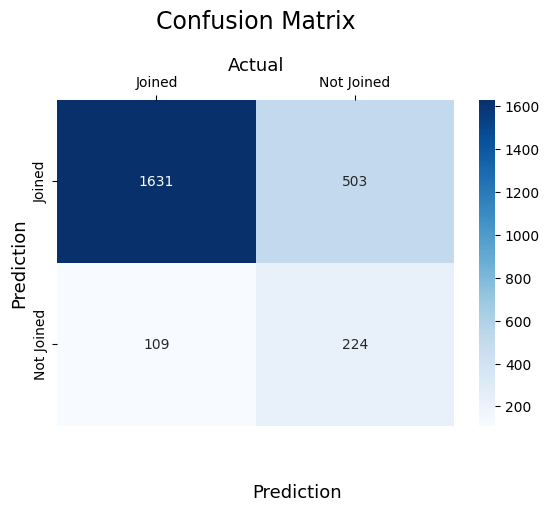

Classification Report:

precision    recall  f1-score   support

           0       0.76      0.94      0.84      1740
           1       0.67      0.31      0.42       727

    accuracy                           0.75      2467
   macro avg       0.72      0.62      0.63      2467
weighted avg       0.74      0.75      0.72      2467

,importance
Notice period,0.319769
DOJ Extended_Yes,0.202747
Percent difference CTC,0.140767
LOB_INFRA,0.088226
Rex in Yrs,0.069528
Age,0.063236
Candidate Source_Employee Referral,0.031139
Location_Noida,0.027211
Offered band_E1,0.012671
LOB_EAS,0.009188


In [ ]:
model4 = train_gradient_boosting()
evaluate_models(model4, X_test, y_test)
feature_imp = pd.DataFrame(
    {'importance':model4.feature_importances_},
    index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

## End of the case analysis